The following project is based on scripts 6 - 9 (from Prof. Chase Kusterer Mashing Learning class) to build a classification model using the Game of Thrones database

In [1]:
import pandas as pd                                      # data science essentials
import matplotlib.pyplot as plt                          # essential graphical output
import seaborn as sns                                    # enhanced graphical output
import numpy as np                                       # mathematical essentials
import statsmodels.formula.api as smf                    # regression modeling
from sklearn.model_selection import train_test_split     # train-test split
from sklearn.linear_model import LogisticRegression      # logistic regression
from sklearn.metrics import roc_auc_score                # auc score
from sklearn.metrics import confusion_matrix             # confusion matrix
from sklearn.tree import DecisionTreeClassifier          # classification trees
from sklearn.tree import plot_tree                       # tree plots
from sklearn.model_selection import RandomizedSearchCV   # hyperparameter tuning
from sklearn.metrics import make_scorer                  # customizable scorer
from sklearn.neighbors import KNeighborsRegressor        # KNN for Regression
from sklearn.preprocessing import StandardScaler         # standard scaler
from sklearn.neighbors import KNeighborsClassifier       # KNN for classification
from sklearn.ensemble import RandomForestClassifier      # random forest
from sklearn.ensemble import GradientBoostingClassifier  # gbm
import gender_guesser.detector as gender                 # gender guesser  

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './Assignment 2/GOT_character_predictions.xlsx'


# reading the file into Python
got = pd.read_excel(io = file)

got.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [2]:
# checking each feature for missing values
got.isnull().sum(axis = 0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In the next two code cells the 'NaN' values were replaced. In the case of Age, it was done with the median and for the rest of the columns, a for loop was created to flag those null values in a new column.

In [3]:
# replace NaN values in age column
got['age']= got['age'].replace(np.nan, got['age'].median())

In [4]:
# flaging NaN values in a new column
for col in got:
    if got[col].isnull().astype(int).sum() > 0:
        got['m_'+col] = got[col].isnull().astype(int)

The gender guesser package was used to evaluate the relationship between the character's gender and the possibility of being alive. However, the results from the regression gave very high p-values and a lot of 'unknowns', so the use of the function was ruled out.

In [483]:
# guessing gender based on name
#placeholder_lst = []

# loop to gess gender
#for name in got["name"]:
#    character = gender.Detector().get_gender(name)
#    placeholder_lst.append(character)

#got['gender_guess'] = pd.Series(placeholder_lst)
    
#got.loc[:  , ['name', 'gender_guess']]

#print(got['gender_guess'].value_counts())

unknown          1852
male               48
female             37
mostly_female       6
mostly_male         3
Name: gender_guess, dtype: int64


In [484]:
#got = pd.get_dummies(got, columns = ['gender_guess'])

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,gender_guess_female,gender_guess_male,gender_guess_mostly_female,gender_guess_mostly_male,gender_guess_unknown
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,27.0,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,27.0,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1


After having filled in all the missing values, the correlation between the response variable (isAlive) and the explanatory variables is analyzed for use in a later model.

In [5]:
# correlations between response and explanatory variables
got_corr = got.corr(method = 'pearson').round(decimals = 2)

got_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
isAliveHeir                   0.38
book4_A_Feast_For_Crows       0.27
isAliveFather                 0.20
isAliveSpouse                 0.17
m_dateOfBirth                 0.15
m_isAliveFather               0.14
m_father                      0.14
m_mother                      0.14
m_isAliveMother               0.14
m_isAliveHeir                 0.13
m_heir                        0.13
m_isAliveSpouse               0.05
m_spouse                      0.05
age                           0.05
m_title                       0.04
m_culture                     0.04
m_house                       0.04
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isAliveMother                -0.04
isNoble                      -0.04
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
dateOfBirth                  -0.09
S.No                         -0.13
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations    

The code below represents the original balance between characters that are alive (1) and those that we don't know if they are (0). 

In [6]:
# stratifying the Response Variable
got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

Declare the explanatory variables as got_data and the response variable (isAlive) as got_target.

In [7]:
# declaring explanatory variables
got_data = got.drop('isAlive', axis = 1)


# declaring response variable
got_target = got.loc[:, 'isAlive']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.1,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}


Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64


Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



Code below represents a Logistic Regression model using explanatory variables that are statistically significant (have a low p-vlaue (<0.05)). 

'logit_sig' and 'logit_sig_2' were named for 2 different sets of significant variables, which were added to a dictionary to store candidate models. 'logit_sig' performed better, so it was chosen as the set to run the different classification models.

In [9]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """isAlive ~ m_dateOfBirth + 
                                                 book1_A_Game_Of_Thrones + 
                                                 book3_A_Storm_Of_Swords +
                                                 book4_A_Feast_For_Crows +
                                                 numDeadRelations +
                                                 popularity""",
                                        data    = got_train)

# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.497368
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.123     
Dependent Variable:   isAlive            AIC:                1755.7819 
Date:                 2021-12-05 15:36   BIC:                1794.0575 
No. Observations:     1751               Log-Likelihood:     -870.89   
Df Model:             6                  LL-Null:            -992.53   
Df Residuals:         1744               LLR p-value:        1.1152e-49
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.0780   0.1617  0.4826 0.6294 -0.2389  0.3950
m_dateOfBirth            0.7692   0.1481  5.1939 0.0000  0.4789  1.0594
book1_A_Game_Of_Thrones -0.5609   0.1489 -3.7676 0.0002 -0.8527 -0.2691
book3_A_Storm_Of_Swords -0.2991   0.1374 -2.1759 0.0296 -0.5684 -0.0297
book4_A_Feast_For_Crows  1.6423   0.1413 11.6215 0.0000  1.3653  1.9193
numDeadRelations        -0.1048   0.0490 -2.1375 0.0326 -0.2009 -0.0087
popularity              -1.1861   0.4404 -2.6929 0.0071 -2.0493 -0.3228
=======================================================================

"""

In [47]:
# creating a dictionary to store candidate models

candidate_dict = {
 # full model
 'logit_full'   : ['m_dateOfBirth', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 
                   'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons',
                   'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 
                   'age', 'numDeadRelations', 'popularity', 'm_mother', 'm_house'],
 
 # significant variables (set 1)
 'logit_sig'    : ['m_dateOfBirth', 'book1_A_Game_Of_Thrones', 'book3_A_Storm_Of_Swords', 
                   'book4_A_Feast_For_Crows', 'popularity'],
    
 # significant variables (set 2)
 'logit_sig_2'  : ['m_house', 'm_dateOfBirth', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 
                   'book4_A_Feast_For_Crows', 'popularity', 'numDeadRelations']}

From this point on, Classification Models and Confusion Matrix will be carried out (in order) for the following model types:
- Logistic Regression,
- Classification Trees (full and pruned),
- K-Nearest Neighbors Classification (KNN), 
- Random Forest, and
- Gradient Boosted Models (GBM)

In [48]:
#######################
# Logistic Regression
#######################

# train/test split with the logit_sig variables
got_data   =  got.loc[ : , candidate_dict['logit_sig']]
got_target =  got.loc[ : , 'isAlive']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.1,
            random_state = 219,
            stratify     = got_target)

# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 3,
                            random_state = 219)

# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING the testing set
logreg_pred = logreg_fit.predict(x_test)

# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test, y_score = logreg_pred).round(4))

# saving scoring data
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy
logreg_auc_score = roc_auc_score(y_true  = y_test, y_score = logreg_pred).round(decimals = 4) # auc

Training ACCURACY: 0.7773
Testing  ACCURACY: 0.8462
AUC Score        : 0.7131


In [49]:
########################################
# Confusion Matrix of Logistic Regression
########################################

# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result 
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 22
False Positives: 28
False Negatives: 2
True Positives : 143



In [50]:
##########################
# Full Classification Tree
##########################

# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train, y_train).round(4))
print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test, y_test).round(4))
print('Full Tree AUC Score        :', roc_auc_score(y_true  = y_test, y_score = full_tree_pred).round(4))


# saving scoring data
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy
full_tree_auc_score   = roc_auc_score(y_true  = y_test, y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8721
Full Tree Testing ACCURACY : 0.7744
Full Tree AUC Score        : 0.7041


In [51]:
#############################
# Confusion Matrix Full Tree
#############################

# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 28
False Positives: 22
False Negatives: 22
True Positives : 123



In [52]:
###############
# Pruned Tree
###############

# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth          = 8,
                                     random_state       = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test, y_score = tree_pruned_pred).round(4))

# saving scoring data
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test, y_score = tree_pruned_pred).round(4) # auc

Training ACCURACY: 0.8338
Testing ACCURACY : 0.8205
AUC Score        : 0.709


In [53]:
###############################
# Confusion Matrix Pruned Tree
###############################

# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pruned_pred).ravel()

# printing each result
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 24
False Positives: 26
False Negatives: 9
True Positives : 136



The following code represent a loop that was used to identify the optimal number of neighbors (k) for the KNN model

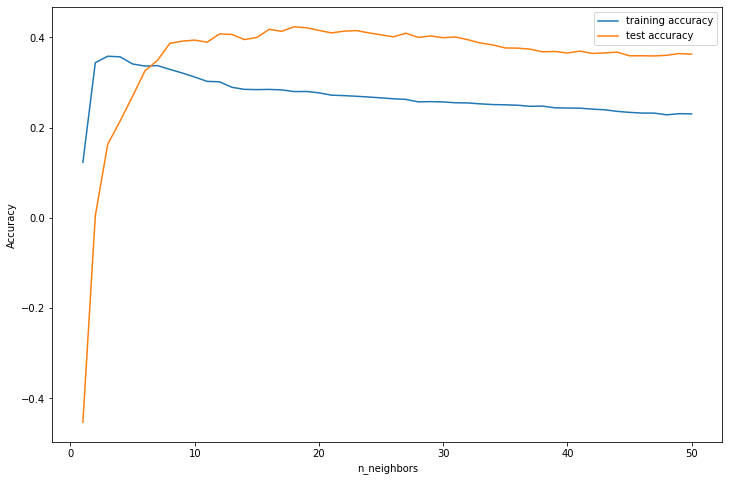

In [54]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [74]:
############
# KNN Model
############
# INSTANTIATING StandardScaler()
scaler = StandardScaler()

# FITTING the data
scaler.fit(got_data)

# TRANSFORMING the data
x_scaled = scaler.transform(got_data)

# converting to a DataFrame
x_scaled_df = pd.DataFrame(x_scaled) 

# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            got_target,
            random_state = 219,
            test_size    = 0.1,
            stratify     = got_target)

# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1

# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)

# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)

# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)

# SCORING the results
print('Training ACCURACY :', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY :', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score         :', roc_auc_score(y_true  = y_test, y_score = knn_pred).round(4))

# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)
knn_auc_score   = roc_auc_score(y_true  = y_test, y_score = knn_pred).round(4)

Training ACCURACY : 0.8075
Testing  ACCURACY : 0.8564
AUC Score         : 0.7659


In [75]:
#######################
# Confusion Matrix KNN
#######################

# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()

# printing each result
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 7
True Positives : 138



In [57]:
#################
# Random Forest 
#################

# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 4,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test, y_score = rf_default_fit_pred).round(4))

# saving scoring data
rf_train_score = rf_default_fit.score(x_train, y_train).round(4) # accuracy
rf_test_score  = rf_default_fit.score(x_test, y_test).round(4)  # accuracy
rf_auc         = roc_auc_score(y_true  = y_test, y_score = rf_default_fit_pred).round(4) # auc

Training ACCURACY: 0.8007
Testing  ACCURACY: 0.8667
AUC Score        : 0.7466


In [58]:
######################################
# Confusion Matrix for Random Forest 
######################################

# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 25
False Positives: 25
False Negatives: 1
True Positives : 144



In [59]:
#################################
# Gradient Boosted Machine Model 
#################################

# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test, y_score = full_gbm_default_pred).round(4))

# saving scoring data for future use
gbm_train_score = full_gbm_default_fit.score(x_train, y_train).round(4) # accuracy
gbm_test_score  = full_gbm_default_fit.score(x_test, y_test).round(4)  # accuracy
gbm_auc         = roc_auc_score(y_true  = y_test, y_score = full_gbm_default_pred).round(4) # auc

Training ACCURACY: 0.827
Testing ACCURACY : 0.8615
AUC Score        : 0.7431


In [60]:
############################
# Confusion Matrix for GBM
############################

# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 25
False Positives: 25
False Negatives: 1
True Positives : 144



RandomizedSearchCV was now applied to find the best Hyperparameter Tuning combination in order to optimize AUC score. Models to which the criterion was applied are:
- Logisting Regression,
- Classification Trees,
- Random Forest, and
- Gradient Boosted Models (GBM)

In [61]:
#################################################
# Hyperparameter Tuning for Logistic Regression
#################################################

# declaring a hyperparameter space
C_range          = np.arange(0.1, 5, 0.1)
warm_start_range = [True, False]
solver_range     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_range,
              'warm_start' : warm_start_range,
              'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(roc_auc_score,
                                                       needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(got_data, got_target)


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': False, 'solver': 'newton-cg', 'C': 4.3999999999999995}
Tuned CV AUC      : 0.6065


In [62]:
#######################################
# Applying Hyperparameter Tuning to LR
#######################################

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 4.3999999999999995,
                              warm_start   = False,
                              solver       = 'newton-cg',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model
lr_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true = y_test, y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy
lr_tuned_auc         = roc_auc_score(y_true  = y_test, y_score = lr_tuned_pred).round(4) # auc

Training ACCURACY: 0.7807
Testing  ACCURACY: 0.8564
AUC Score        : 0.7331


In [63]:
###################################################
# Confussion Matrix with Hyperparameter Tuning (LR) 
###################################################

# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 24
False Positives: 26
False Negatives: 2
True Positives : 143



In [64]:
#####################################################
# Hyperparameter Tuning for Decision Tree Classifier
#####################################################

# declaring a hyperparameter space
criterion_range    = ['gini', 'entropy']
splitter_range     = ['best', 'random']
depth_range        = np.arange(1, 8, 1)
leaf_range         = np.arange(1, 100, 1)

# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tree_tuned = DecisionTreeClassifier(random_state = 219,
                                    max_depth    = 5)


# GridSearchCV object
tree_tuned_cv = RandomizedSearchCV(estimator           = tree_tuned, # the model object
                                   param_distributions = param_grid, # parameters to tune
                                   cv                  = 3,          # how many folds in cross-validation
                                   n_iter              = 1000,        # number of combinations of hyperparameters to try
                                   random_state        = 219,        # starting point for random sequence
                                   scoring = make_scorer(roc_auc_score,
                                                         needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_cv.fit(got_data, got_target)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tree_tuned_cv.best_params_)
print("Tuned CV AUC      :", tree_tuned_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 4, 'max_depth': 5, 'criterion': 'gini'}
Tuned CV AUC      : 0.6649


In [65]:
######################################
# Applying Hyperparameter Tuning to DTC
######################################

# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter           = 'best',
                                    min_samples_leaf   = 4,
                                    max_depth          = 5,
                                    criterion          = 'gini',
                                    random_state       = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY :', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY :', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score         :', roc_auc_score(y_true  = y_test, y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy
tree_tuned_auc         = roc_auc_score(y_true  = y_test, y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY : 0.8053
Testing  ACCURACY : 0.8667
AUC Score         : 0.7531


In [66]:
###############################################
# Confussion Matrix with Hyperparameter Tuning 
###############################################

# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 26
False Positives: 24
False Negatives: 2
True Positives : 143



Running this code can take 30 min. approx. For convenience, the results were added as comments next to each feature.

In [40]:
###########################################
# Hyperparameter Tuning for Random Forest 
###########################################

# FITTING the training data
#rf_default_fit = rf_default.fit(x_train, y_train)

# PREDICTING based on the testing set
#rf_default_fit_pred = rf_default_fit.predict(x_test)

# declaring a hyperparameter space
#estimator_range  = np.arange(100, 1100, 250)  #result: 600
#leaf_range       = np.arange(1, 31, 10)       #result: 1
#criterion_range  = ['gini', 'entropy']        #result: gini
#bootstrap_range  = [True, False]              #result: True
#max_depth_range  = np.arange(1, 8, 1)         #result: 7
#warm_start_range = [True, False]              #result: True


# creating a hyperparameter grid
#param_grid = {'n_estimators'     : estimator_range,
#              'min_samples_leaf' : leaf_range,
#              'criterion'        : criterion_range,
#              'bootstrap'        : bootstrap_range,
#              'max_depth'        : max_depth_range,
#              'warm_start'       : warm_start_range}

# INSTANTIATING the model object without hyperparameters
#forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
#forest_cv = RandomizedSearchCV(estimator           = forest_grid,
#                               param_distributions = param_grid,
#                               cv                  = 3,
#                               n_iter              = 1000,
#                               scoring             = make_scorer(roc_auc_score, needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#forest_cv.fit(got_data, got_target)

# printing the optimal parameters and best score
#print("Tuned Parameters  :", forest_cv.best_params_)
#print("Tuned Training AUC:", forest_cv.best_score_.round(4))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 672 is smaller than n_iter=1000. Running 672 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 850, 'min_samples_leaf': 1, 'max_depth': 7, 'criterion': 'gini', 'bootstrap': True}
Tuned Training AUC: 0.6664


In [67]:
#######################################
# Applying Hyperparameter Tuning to RF
#######################################

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'gini',
                                      min_samples_leaf = 1,
                                      n_estimators     = 850,
                                      max_depth        = 7,
                                      warm_start       = True,
                                      bootstrap        = True)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)

# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test, y_score = forest_tuned_pred).round(4))

# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy
forest_tuned_auc = roc_auc_score(y_true  = y_test, y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8338
Forest Tuned Testing  ACCURACY: 0.8872
Forest Tuned AUC Score        : 0.7866


In [68]:
#################################################
# Confussion Matrix with Hyperparameter Tuning (RF)
#################################################

# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 1
True Positives : 144



Running this code can take 15 min. approx. For convenience, the results were added as comments next to each feature.

In [43]:
#################################
# Hyperparameter Tuning for GBM
#################################

# declaring a hyperparameter space
#loss_range         = ['deviance', 'exponential']  #result: exponential
#learning_range     = np.arange(0.1, 3.2, 0.5)     #result: 2.1
#max_features_range = ['auto', 'sqrt', 'log2']     #result: log2
#estimator_range    = np.arange(100, 500, 25)      #result: 175
#depth_range        = np.arange(1, 8, 1)           #result: 5
#warm_start_range   = [True, False]                #result: True

# creating a hyperparameter grid
#param_grid = {'loss'          : loss_range, 
#              'learning_rate' : learning_range,
#              'max_features'  : max_features_range,
#              'max_depth'     : depth_range,
#              'n_estimators'  : estimator_range,
#              'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
#full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
#full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
#                           param_distributions = param_grid,
#                           cv                  = 3,
#                           n_iter              = 500,
#                           random_state        = 219,
#                           scoring             = make_scorer(roc_auc_score,
#                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#full_gbm_cv.fit(got_data, got_target)

# printing the optimal parameters and best score
#print("Tuned Parameters  :", full_gbm_cv.best_params_)
#print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

In [69]:
#######################################
# Applying Hyperparameter Tuning to GBM
#######################################

gbm_tuned = GradientBoostingClassifier(learning_rate = 3.1,
                                       loss          = 'exponential',
                                       max_features  = 'auto',
                                       max_depth     = 4,
                                       n_estimators  = 125,
                                       warm_start    = False)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test, y_score = gbm_tuned_pred).round(4))

# saving scoring data
gbm_tuned_train_score = gbm_tuned_fit.score(x_train, y_train).round(4) # accuracy
gbm_tuned_test_score  = gbm_tuned_fit.score(x_test, y_test).round(4)   # accuracy
gbm_tuned_auc = roc_auc_score(y_true  = y_test, y_score = gbm_tuned_pred).round(4) # auc

Training ACCURACY: 0.7476
Testing  ACCURACY: 0.8154
AUC Score        : 0.7972


In [70]:
#################################################
# Confussion Matrix with Hyperparameter Tuning (GBM)
#################################################

# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 38
False Positives: 12
False Negatives: 24
True Positives : 121



In [76]:
#########################
# Results for all Models 
#########################

# comparing results
print(f"""
Model         AUC Score    Training Accuracy    Testing Accuracy     TN, FP, FN, TP
-----         ---------    -----------------    ----------------     --------------
Logistic       {logreg_auc_score}\t\t{logreg_train_score}\t\t     {logreg_test_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree      {full_tree_auc_score}\t\t{full_tree_train_score}\t\t     {full_tree_test_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree    {pruned_tree_auc_score}\t\t{pruned_tree_train_score}\t\t     {pruned_tree_test_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
KNN            {knn_auc_score}\t\t{knn_train_score}\t             {knn_test_score}         {knn_tree_tn, knn_tree_fp, knn_tree_fn, knn_tree_tp}
Random Forest  {rf_auc}\t        {rf_train_score}\t             {rf_test_score}         {rf_tn, rf_fp, rf_fn, rf_tp}
GBM            {gbm_auc}\t        {gbm_train_score}\t             {gbm_test_score}         {gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp}
Tuned LR       {lr_tuned_auc}\t\t{lr_tuned_train_score}\t\t     {lr_tuned_test_score}\t    {lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp}
Tuned Tree     {tree_tuned_auc}\t\t{tree_tuned_train_score}\t\t     {tree_tuned_test_score}\t    {tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp}
* Tuned RF     {forest_tuned_auc}\t\t{forest_tuned_train_score}\t\t     {forest_tuned_test_score}\t    {tuned_rf_tn, tuned_rf_fp, tuned_rf_fn, tuned_rf_tp}
Tuned GBM      {gbm_tuned_auc}\t\t{gbm_tuned_train_score}\t\t     {gbm_tuned_test_score} \t    {gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp}

* Chosen Model

""")

# creating a dictionary for model results
model_performance = {
    
    'Model Name'        : ['Logistic', 'Full Tree', 'Pruned Tree', 'KNN', 
                           'Random Forest', 'GBM', 'Tuned LR', 'Tuned Tree', 
                           'Tuned RF', 'Tuned GBM'],
           
    'AUC Score'         : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score, 
                           knn_auc_score, rf_auc, gbm_auc, lr_tuned_auc, tree_tuned_auc,
                           forest_tuned_auc, gbm_tuned_auc],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score, knn_train_score,
                           rf_train_score, gbm_train_score, 
                           lr_tuned_train_score, tree_tuned_train_score,
                           forest_tuned_train_score, gbm_tuned_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score, knn_test_score, 
                           rf_test_score, gbm_test_score, lr_tuned_test_score, 
                           tree_tuned_test_score, forest_tuned_test_score, gbm_tuned_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                           (knn_tree_tn, knn_tree_fp, knn_tree_fn, knn_tree_tp),
                           (rf_tn, rf_fp, rf_fn, rf_tp),
                           (gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp),
                           (lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),
                           (tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp),
                           (tuned_rf_tn, tuned_rf_fp, tuned_rf_fn, tuned_rf_tp),
                           (gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp)]}
    
# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


Model         AUC Score    Training Accuracy    Testing Accuracy     TN, FP, FN, TP
-----         ---------    -----------------    ----------------     --------------
Logistic       0.7131		0.7773		     0.8462         (22, 28, 2, 143)
Full Tree      0.7041		0.8721		     0.7744         (28, 22, 22, 123)
Pruned Tree    0.709		0.8338		     0.8205         (24, 26, 9, 136)
KNN            0.7659		0.8075	             0.8564         (29, 21, 7, 138)
Random Forest  0.7466	        0.8007	             0.8667         (25, 25, 1, 144)
GBM            0.7431	        0.827	             0.8615         (25, 25, 1, 144)
Tuned LR       0.7331		0.7807		     0.8564	    (24, 26, 2, 143)
Tuned Tree     0.7531		0.8053		     0.8667	    (26, 24, 2, 143)
* Tuned RF     0.7866		0.8338		     0.8872	    (29, 21, 1, 144)
Tuned GBM      0.7972		0.7476		     0.8154 	    (38, 12, 24, 121)

* Chosen Model




After having analyzed the results of all the Classification Models, it is obtained that Tuned RF is the one with the best performance given its high AUC Score. Although it is not the highest score of all, it has a low gap between its Training & Testing Accuracy and is the model with the least amount of false negatives and false positives overall.